# 1. Arbres - B

### Définition

Pour fixer les idées je rappelle ici la définition d'un B-arbre:

- Un B-arbre peut être vide, s'il ne l'est pas aucun de ses sous-arbres l'est.
- Chaque noeud d'un B-arbre contient une liste de clés triées. Un noeud **interne** ayant $k$-clés a $(k+1)$-fils on dit que c'est un $(k+1)$-noeud.
- La clé en position $i$ d'un noeud a un fils gauche et un autre droit, respectivement le $i$-ème fils et le $(i+1)$-ème. Les clés du fils gauche sont plus petite que la clé $i$ et celle du fils droit plus grandes. En ce sens un B-arbre non-vide est un arbre général de recherche.
- Un B-arbre a un degré $t > 1$ :
    - la racine a au plus $2t-1$ clés
    - tout autre noeud a au moins $t-1$ clés et au plus $2t-1$.

In [458]:
from algopy import btree
from algopy.btree import BTree

Dans l'implémentation précédente un arbre vide est repéré par un `None` et une feuille par le fait que ca liste de fils est vide. L'attribut `degree` est un attribut de classe, il permet d'instancier des classes ayant un degré donné. Par exemple, pour les 2-3-4 on peut définir la classe:

In [459]:
class B234(BTree):
    degree = 2

In [460]:
Dummy = B234([22], 
             [B234([15], 
                   [B234([8, 12]), B234([18, 19, 20])]), 
              B234([27, 41], 
                   [B234([24, 25]), B234([30, 35, 38]), B234([45, 48])])])

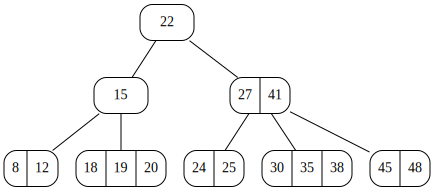

In [461]:
btree.display(Dummy)


## Exercice 1.3 : En ordre

Écrire une fonction qui construit une liste des clés d'un B-arbre en ordre croissant

In [462]:
def __btreeseq(B, L):
    if not B.children:
        for i in range(B.nbkeys):
            L.append(B.keys[i])
    else:
        for i in range(B.nbkeys):
            __btreeseq(B.children[i], L)
            L.append(B.keys[i])
        __btreeseq(B.children[B.nbkeys], L)
        
def btreeseq(B):
    L = []
    __btreeseq(B, L)
    return L

In [463]:
btreeseq(Dummy)

[8, 12, 15, 18, 19, 20, 22, 24, 25, 27, 30, 35, 38, 41, 45, 48]

## Exercice 1.4 : Représentation linéaire

### Sérialisation d'un B-arbre

En traitement préfixe on affiche la liste des clés d'un noeud puis en traitement suffice on ferme la parenthèse.

In [464]:
def __btreetolist(B):
    s = "(<" + str(B.keys[0])
    for i in range(1, B.nbkeys):
        s += "," + str(B.keys[i])
    s += ">"
    for child in B.children:
           s += __btreetolist(child)
    return s + ")"
    
def btreetolist(B):
    if not B:
        return "()"
    return __btreetolist(B)

In [465]:
btreetolist(Dummy)

'(<22>(<15>(<8,12>)(<18,19,20>))(<27,41>(<24,25>)(<30,35,38>)(<45,48>)))'

### D'une liste vers un B-arbre

Afin de pouvoir lire les fils d'un noeuds il est nécessaire de renvoyer la position courante de lecture de la chaine de charactère.

In [466]:
def __fromlist(s, i = 0): 
    if i < len(s) and s[i] == '(':   # can this test be removed?
        i = i + 2 # to pass the '(<'
        B = BTree()
        while s[i] != '>':
            key = ""            
            while not(s[i] in ',>'):
                key += s[i]
                i += 1
            B.keys.append(int(key))
            if s[i] == ',':
                i += 1 
        i += 1  # to pass the '>'
        B.children = []
        while s[i] != ')':
            (C, i) = __fromlist(s, i)
            B.children.append(C)
        i = i + 1   # to pass the ')'
        return (B, i)
    else:
        return None

def fromlist(s, d):
    BTree.degree = d
    (B, _) = __fromlist(s)
    return B

# 2. Les classiques

Pour simplifier : dans un noeud le fils gauche de la clé i correspond au ieme fils du noeud, le fils droit au ieme + 1.

## Exercice 2.1 : Minimum et maximum

### 1. Où se trouve la valeur minimal et celle maximale d'un B-arbre?

Les valeurs extrémales sont en feuilles : la minimale dans la feuille la plus à gauche, celle maximale dans la plus à droite.

### 2. Écrire les fonctions qui permettent de récupérer les valeurs minimales et maximales d'un B-arbre.

In [467]:
def bmin(B):
    if not B:
        return None
    while B.children: 
        B = B.children[0]
    return B.keys[0]
    

In [468]:
bmin(Dummy)

8

En récursif

In [469]:
def _minbtree(B):
    if B.children:
        return _minbtree(B.children[0])
    else:
        return B.keys[0]  
    
def minbtree(B):
    if not B:
        return None
    return _minbtree(B)

In [470]:
minbtree(Dummy)

8

In [471]:
def bmax(B):
    if not B:
        return None
    while B.children: 
        B = B.children[-1]
    return B.keys[-1]

In [472]:
bmax(Dummy)

48

In [473]:
def _maxbtree(B):
    if B.children:
        return _maxbtree(B.children[-1])
    else:
        return B.keys[-1]  
    
def maxbtree(B):
    if not B:
        return None
    return _maxbtree(B)

In [474]:
maxbtree(Dummy)

48

## Exercice 2.2 : Recherche

Une fonction recherche d'un éléments dans un B-arbre : elle retourne <tt>(N, i)</tt> si l'élément recherché est à la clé <tt>i</tt> du noeud <tt>N</tt> et <tt>None</tt> sinon.

In [475]:
def ksearch(L, x, r):
    l = 0
    m = (r + l) // 2
    while r > l and L[m] != x:
        if x < L[m]:
            r = m
        else:
            l = m + 1
        m = (r + l) // 2
    return m 

def bsearch(A, x):
    i = ksearch(A.keys, x, A.nbkeys)
    if i < A.nbkeys and A.keys[i] == x:
        return A, i
    if A.children:
        return bsearch(A.children[i], x)

In [476]:
ksearch([1,2,4,5,26,32], 0, 6)

0

In [477]:
bsearch(Dummy, 48)

(<__main__.B234 at 0x7fced48f2908>, 1)

## Exercice 2.3 : Insérer un nouvel élément (méthode classique)


### 1.a. Où peut-on insérer un nouvel élément dans un B-arbre afin qu'il conserve ces propriétés?

En feuille, à condition qu'il y ai suffisamment de place: le remplissage des clés ne doit pas être égal à <tt>2t-1</tt> où <tt>t</tt> est le degré du B-arbre avec lequel on travaille.

### 1.b. Quel problème cela pose?

Le fait de savoir s'il y a assez de place en feuille.

### 1.c. Quelle transformation peut-être appliquée à l'arbre pour le résoudre? Dans quelles conditions peut-on effectuer cette transformation?

On peut éclater la feuille courante à la position médiane pour obtenir deux feuilles contenant <tt>t-1</tt> clés chacune, la clé mediane remonte vers le noeud père. Cette transformation ne peut être effectuée que si le noeud père n'est pas plein à son tour.

### 1.d. Écrire cette transformation dans le cas où le noeuds père n'est pas plein et le noeud courant n'est pas la racine. 

In [478]:
def bsplit(A, i):
    """Split child i of node
    
    Splitting full child i of A assuming A has enough room 
    for median element
    
    """
    t = A.degree  # degree of B-tree. mid index is t-1
    Cil = A.children[i]
    
    # Upgrading median key to father's key
    A.keys.insert(i, Cil.keys[t-1])
    
    # Splitting node
    Cir = BTree()
    Cir.degree = t
    
    # Building up the split subtrees
    (Cir.keys, Cil.keys) = (Cil.keys[t:], Cil.keys[:t-1])
    (Cir.children, Cil.children) = (Cil.children[t:], Cil.children[:t])
    
    # Updating list of children of A
    A.children.insert(i+1, Cir) 

    return(A)

In [479]:
subDummy = B234([15],[B234([8, 12]), B234([18, 19, 20])])

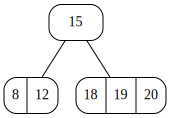

In [480]:
btree.display(subDummy)

In [481]:
bsplit(subDummy, 1)

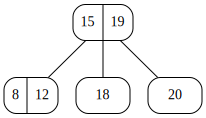

In [482]:
btree.display(subDummy)

### 2. Donner le principe d'insertion à la descente et à la remontée

Pour le principe d'insertion à la descente on éclate tous les noeuds pleins, en particulier on rajoute une racine si la racine l'est. Pour ce qui est de l'insertion à la remontée on doit éclater successivement tous les pères pleins de la feuille pleine d'insertion jusqu'à trouver de la place; on ajoute une racine si cette remontée est infructueuse.

### 3. Écrire la fonction dans un B-arbre en appliquant le principe de précaution


In [483]:
def _binsert(A, x, t):
    i = ksearch(A.keys, x, A.nbkeys)
    print("ksearch result: {}".format(i))
    if i >= A.nbkeys or A.keys[i] != x:
        if A.children:
            Ci = A.children[i]
            if Ci.nbkeys == (2*t - 1):
                bsplit(A, i)
                if x > A.keys[i]:
                    Ci = A.children[i+1]
            _binsert(Ci, x, t)
        else:
            A.keys.insert(i, x) #leaf

def binsert(A, x, t): #Giving degree, needed when A is none.
    if not A:
        return BTree([x], [])
    if A.nbkeys == (2*t - 1):        
        A = BTree([], [A])
        A.degree = t
        bsplit(A, 0)
    _binsert(A, x, t)
    return A

ksearch result: 1
ksearch result: 1
ksearch result: 0


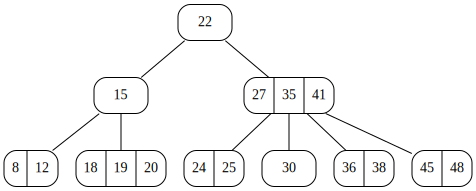

In [484]:
binsert(Dummy, 36, 2)
btree.display(Dummy)

ksearch result: 1
ksearch result: 1
ksearch result: 2


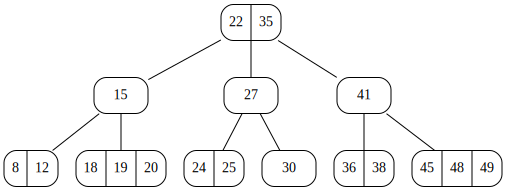

In [485]:
binsert(Dummy, 49, 2)
btree.display(Dummy)

## Exercice 2.4 : Suppression d'un élément à la descente

### 1. Comment supprimer une clé lorsqu'on n'est pas en feuille?

Bah, ça pose problème. Supposons qu'on supprime la $i$-ème clé d'un noeud, une manière de faire est de chercher à faire remonter la plus grande clé du sous-arbre gauche de la $i$-ème clé ou la plus petite du sous-arbre droit. Mais on se trouve dans ce cas devant le problème suivant : il se peut que le sous-arbre qu'on détrousse n'ai qu'une racine à  $t-1$ clés et que ses voisins n'ai que $2t-1$ cumulées à eux deux. Dans ce cas on pourrait envisager de simplement fusionner le fils à détrousser avec l'un de ses voisins, mais cela n'est valable que si le père ne se retrouve pas avec $t-1$ clés car une clé du père est nécessaire pour effectuer la fusion.  

### 2. Quelle approche adaptée des AVL peut nous être utiles?

Les rotations gauches et droites.

### Implémtation rotation gauche

Pour que celle-ci fasse sens il faut qu'on ai un fils droit et que celui-ci ait au moins $t$ clés. De plus, il faut garantir que le fils gauche a moins de $2t-1$ clés. À l'évidence il doit y avoir un père.

In [486]:
def blr(A, i):
    """Rotation from child i+1 to child i.
    
    Conditions: 
    - the tree A exists, 
    - its child i exists and its root is not a 2t-node, 
    - its child i+1 exists and its root is not a t-node.
    
    """
    Cr = A.children[i+1]
    Cl = A.children[i]
    
    Cl.keys.append(A.keys[i])
    
    A.keys[i] = Cr.keys.pop(0)
    
    if Cr.children:
        Cl.children.append(Cr.children.pop(0))    

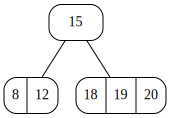

In [487]:
subDummy = B234([15],[B234([8, 12]), B234([18, 19, 20])])
btree.display(subDummy)

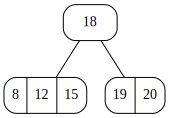

In [488]:
blr(subDummy, 0)
btree.display(subDummy)

### Implémtation rotation droite

Pour que celle-ci fasse sens il faut qu'on ai un fils gauche et que celui-ci ait au moins $t$ clés. De plus, il faut garantir que le fils droit a moins de $2t-1$ clés. Il est nécssaire d'avoir un père.

In [489]:
def brr(A, i):
    """Rotation from child i-1 to child i.
    
    Conditions: 
    - the tree A exists, 
    - its child i exists and its root is not a 2t-node, 
    - its child i-1 exists and its root is not a t-node.
    
    """
    Cr = A.children[i]
    Cl = A.children[i-1]
    
    Cr.keys.insert(0, A.keys[i-1])
    
    A.keys[i-1] = Cl.keys.pop()
    
    if Cl.children:
        Cr.children.insert(0, Cl.chidren.pop())

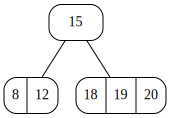

In [490]:
brr(subDummy, 1)
btree.display(subDummy)

### 3. Quel autre problème peut apparaître lors d'une suppression?


### Implémentation fusion

In [491]:
def fusion(A, i):
    """Merge A children i and i+1 into child i.
    
    Conditions: 
    - the tree A exists and its root is not a t-node,
    - children i and i+1 exist and their roots are t-nodes.
    
    """    
    Cr = A.children[i+1]
    Cl = A.children[i]
    
    Cl.keys.append(A.keys.pop(i))
    
    Cl.keys += Cr.keys #creates a shallow copy
    Cl.children += Cr.children #creates a shallow copy 
    
    A.children.pop(i+1)

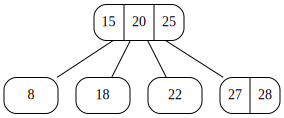

In [492]:
fusionDummy = B234([15,20,25],[B234([8]), B234([18]), B234([22]), B234([27, 28])])
btree.display(fusionDummy)

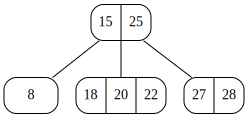

In [493]:
fusion(fusionDummy, 1)
btree.display(fusionDummy)

### 4. En suivant le principe de précaution, préconisé dans le cas de l'insertion, comment procéder dans le cas d'une suppréssion?

À chaque recherche négative dans un $t$-noeud on suit les règles suivantes :

- Si l'un des noeuds voisins, en préviligiant d'abord le gauche, contient $t$ clés on effectue la rotation correspondante pour renflouer le noeud courant.
- Si les noeuds voisins sont des $t$-noeuds on fusionne le noeud courant avec son fils gauche ou droit, toujours en préviligiant le gauche.

Dans le cas d'une recherche positive dans un noeud courant :

- On copie la plus grande clé du sous-arbre gauche ou la plus petite du sous-arbre droit, toujours en privilègiant le gauche, en écrasant la clé à supprimer. On supprime dans le le sous-arbre correspondant la clé copiée. Le choix du sous-arbre se fait suivant le nombre de clés dans la racine. Si les deux sous-arbres n'en ont que $t-1$ on commencera par les fusionner, dans ce cas la clé recherchée descend dans le noeud fusionné, on rappelle la supression avec ce sous-arbre et notre clé rechercée courante. 
 
De cette manière, à la suppression dans une feuille, on est garantit qu'elle contient au moins $t$ clés. 

### Implémentation de la suppression

In [494]:
def __delete(A, x):
    pos = ksearch(A.keys, x, A.nbkeys)
    if A.children:
        if pos < A.nbkeys and A.keys[pos] == x:
            if A.children[pos].nbkeys > A.children[pos + 1].nbkeys:
                A.keys[pos] = maxbtree(A.children[pos])
                __delete(A.children[pos], A.keys[pos])
            elif A.children[pos+1].nbkeys > A.degree - 1:
                A.keys[pos] = minbtree(A.children[pos+1])
                __delete(A.children[pos+1], A.keys[pos])
            else:
                fusion(A, pos) # notice that you always have a right child in this case
                __delete(A.children[pos], x)
        else:        
            if A.children[pos].nbkeys == A.degree - 1:
                if pos > 0 and A.children[pos - 1].nbkeys > A.degree - 1:
                    brr(A, pos)
                elif pos < A.nbkeys and A.children[pos + 1].nbkeys > A.degree - 1:
                    blr(A, pos)
                else:
                    if pos == A.nbkeys:
                        fusion(A, pos-1)
                    else:
                        fusion(A, pos)
            __delete(A.children[pos], x)
    else:
        print("Traitement feuille")
        if pos < A.nbkeys and A.keys[pos] == x:
            print("Traitement feuille positif")
            A.keys.pop(pos)

def delete(A, x):
    if A != None:
        __delete(A, x)
        
        if A.nbkeys > 0:
            return A
        
        elif A.children:
            return A.children[0]
    
    return None

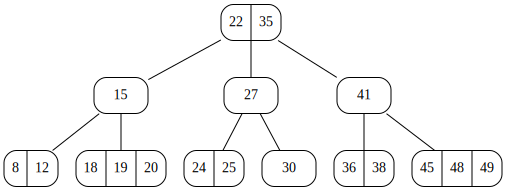

In [495]:
btree.display(Dummy)

Traitement feuille


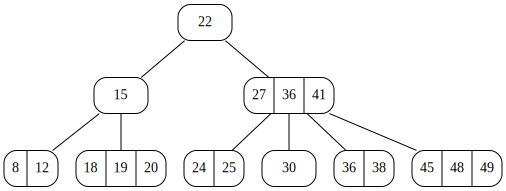

In [496]:
btree.display(delete(Dummy, 35))